# package

Lima baris pertama dari dataset:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes   

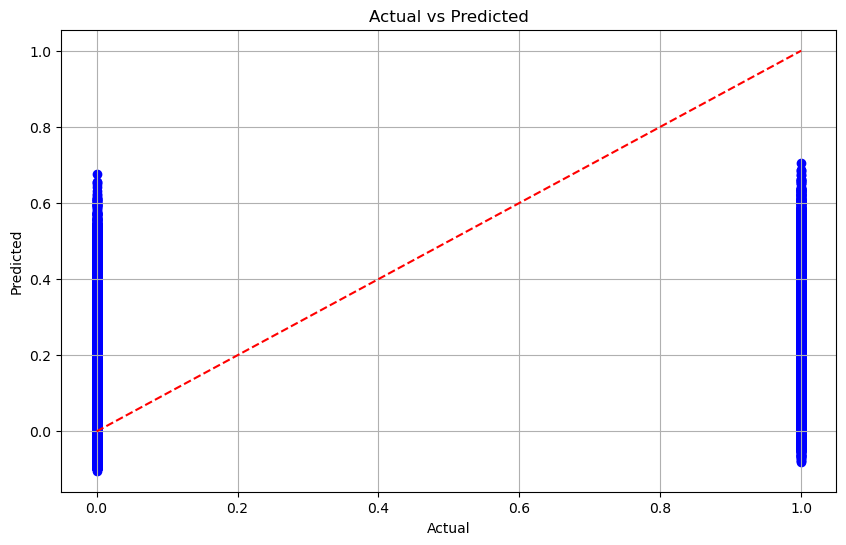

Dimensi data pelatihan: X_train: (191877, 17), y_train: (191877,)
Dimensi data pengujian: X_test: (127918, 17), y_test: (127918,)

Mean Squared Error (MSE): 0.0683264267268703
Mean Absolute Error (MAE): 0.14736465604499835
R-squared (R2): 0.12975158325763125

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]


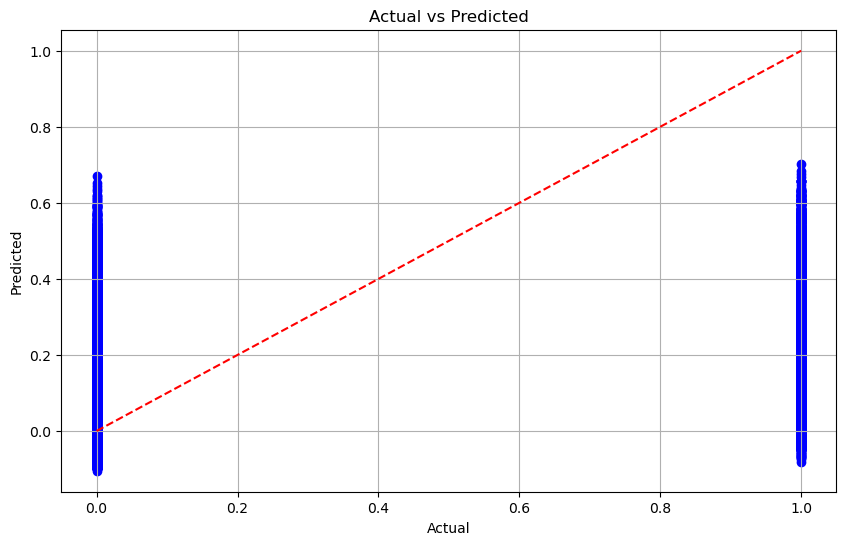

Dimensi data pelatihan: X_train: (223856, 17), y_train: (223856,)
Dimensi data pengujian: X_test: (95939, 17), y_test: (95939,)

Mean Squared Error (MSE): 0.06881296268553944
Mean Absolute Error (MAE): 0.14785397239554682
R-squared (R2): 0.12831587826987378

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]


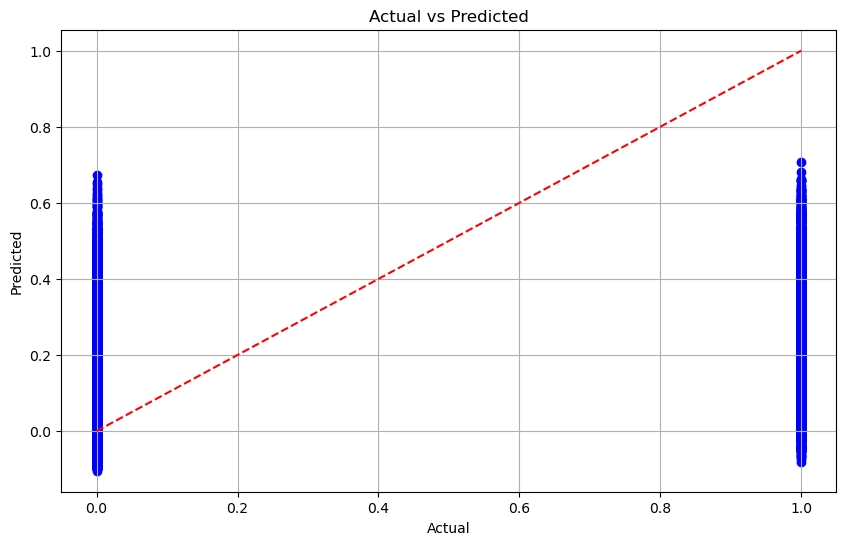

Dimensi data pelatihan: X_train: (255836, 17), y_train: (255836,)
Dimensi data pengujian: X_test: (63959, 17), y_test: (63959,)

Mean Squared Error (MSE): 0.06940138753966653
Mean Absolute Error (MAE): 0.14850802675579253
R-squared (R2): 0.13016485928428378

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]


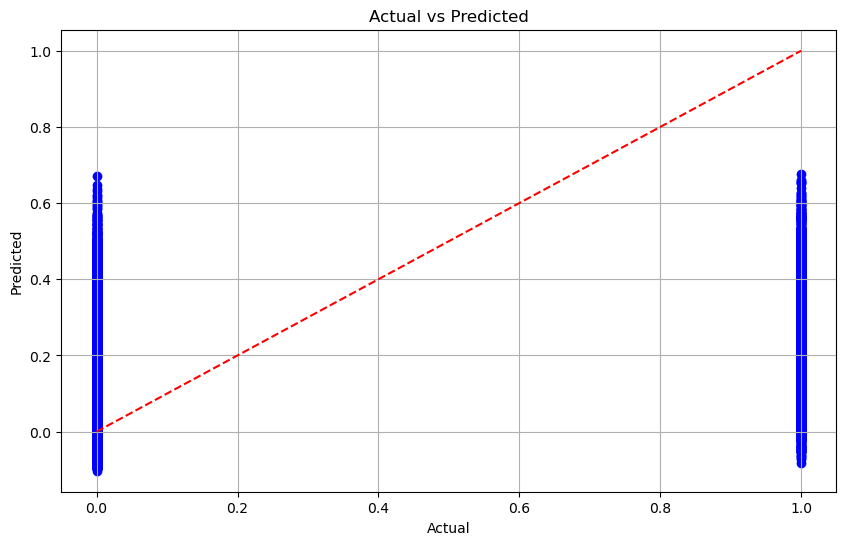

Dimensi data pelatihan: X_train: (287815, 17), y_train: (287815,)
Dimensi data pengujian: X_test: (31980, 17), y_test: (31980,)

Mean Squared Error (MSE): 0.07090329917652145
Mean Absolute Error (MAE): 0.15012903672958866
R-squared (R2): 0.13149530022736589

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]

Cross-validation Mean Absolute Error (MAE): [0.15128862 0.14607125 0.1442603  0.14819864 0.14530497]
Cross-validation Mean Squared Error (MSE): [0.06952117 0.06741747 0.06672358 0.06933652 0.0671066 ]
Cross-validation R-squared (R2): [0.13619814 0.13193952 0.12832371 0.12773247 0.130122  ]


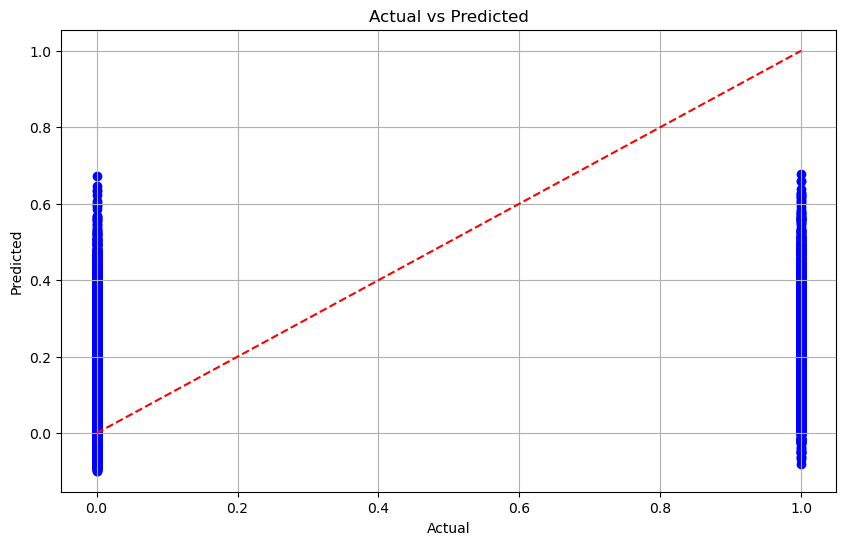

In [1]:
# package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

# dataset
file_path = '/home/sembarang/DATA/S1_Udinus/Matkul_Semester_4/Pembelajaran_Mesin/A11202214632_EphesiansPrismaranatha_A114422_FPML/heart_2020_cleaned.csv'
df = pd.read_csv(file_path)

# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(df.head())

# preprocessing data
label_encoders = {}
categorical_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
                       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 
                       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# label encoder mengonversi variabel kategori menjadi numerik
for column in categorical_columns:
    le = LabelEncoder() 
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Standarisasi data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# splitting data ratio
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]

results = []

for ratio in split_ratios:
    # Membagi data menjadi data pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)
    
    # Menampilkan dimensi data pelatihan dan pengujian
    print(f"Dimensi data pelatihan: X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Dimensi data pengujian: X_test: {X_test.shape}, y_test: {y_test.shape}")

    # Membuat pipeline yang mencakup scaling dan model MLR
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlr', LinearRegression())
    ])

    # Melatih model menggunakan data pelatihan
    pipeline.fit(X_train, y_train)

    # Memprediksi data pengujian
    y_pred = pipeline.predict(X_test)

    # Menghitung dan menampilkan evaluasi models
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\nMean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)

    # Melakukan validasi silang dengan 5 lipatan (folds) pada pipeline dan menghitung MAE, MSE, dan R-squared
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

    print("\nCross-validation Mean Absolute Error (MAE):", -cv_results['test_neg_mean_absolute_error'])
    print("Cross-validation Mean Squared Error (MSE):", -cv_results['test_neg_mean_squared_error'])
    print("Cross-validation R-squared (R2):", cv_results['test_r2'])

    print("\nCross-validation Mean Absolute Error (MAE):", -cv_results['test_neg_mean_absolute_error'])
    print("Cross-validation Mean Squared Error (MSE):", -cv_results['test_neg_mean_squared_error'])
    print("Cross-validation R-squared (R2):", cv_results['test_r2'])

    # Plot hasil prediksi
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.grid(True)
    plt.show()

